In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
df = pd.read_csv("cluster_enter_group.csv") # reads the csv and creates the dataframe called movie
df.tail()
# len(df)

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,...,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง,clusters,Unnamed: 21
182,186,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,3,เลือกชมไม่กี่ร้าน
183,185,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,เลือกชมไม่กี่ร้าน
184,113,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3,เลือกชมไม่กี่ร้าน
185,92,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,เลือกชมไม่กี่ร้าน
186,17,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,3,เลือกชมไม่กี่ร้าน


In [10]:
new_df = df[df['ร้าน 3 ป. ขาหมู อาหารตามสั่ง']!=1]
new_df

,user_id,Salad In The Box,SteakHolder,ANWAR BURGER,สมใจ ลูกชิ้นทอด,น้องแนนหมูปิ้ง,ปังเย็น,เครื่องดื่ม ยำผลไม้ ผลไม้,ข้าวแกงชุดอิ่มอร่อย,ตำยำย่าง อาหารอีสาน ลาบยโส,...,ข้าวหน้าเป็ด-ข้าวหมูแดง-ข้าวหมูกรอบ,ข้าวยำไก่ย่าง ข้าวมันไก่ 2 สี,แชมป์ฮั้งเพ้ง,ชาย 4 บะหมี่เกี๊ยว,ร้าน 3 ป. ขาหมู อาหารตามสั่ง,อาหารอิสลาม Halal Food,ร้านอาหารตามสั่งอิ่มอร่อย,พินิจโต้รุ่ง,clusters,Unnamed: 21
1,52,1,1,1,1,1,0,0,1,1,...,1,1,1,0,0,1,1,0,0,สนใจและเลือกเข้าชมหลายร้าน
8,187,0,1,1,0,1,1,0,0,1,...,0,0,1,1,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
9,101,0,0,1,1,1,1,0,1,0,...,0,0,1,1,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
10,73,0,0,1,0,0,1,0,0,1,...,0,1,1,1,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
11,214,0,0,1,1,1,0,0,0,0,...,0,1,1,1,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
12,189,1,1,1,1,1,1,0,1,0,...,0,0,0,0,0,0,0,1,0,สนใจและเลือกเข้าชมหลายร้าน
21,265,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
22,246,1,1,1,0,1,1,0,0,1,...,0,0,0,0,0,0,1,1,0,สนใจและเลือกเข้าชมหลายร้าน
25,158,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,ชอบเสต็ก เลือกเข้าชมร้าน SteakHolder
26,157,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,เลือกเข้าชมร้าน SteakHolder


In [56]:

df_info = pd.read_csv("info_csv2.csv") # reads the csv and creates the dataframe called movie

# df_info_user_never_entered2 =df_info.loc[df_info['user_id'] == 185]

In [65]:
# df2=df.drop(['birthdate','age'
#             ,'breakfast','lunch','dinner','late','taste','price','service','clean',
#             'at','location','facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill',
#             'steak','fastfood','cake','dessert','coffee','juice','created_at','user_id'],1)

df_meal=df_info.drop(['id','birthdate','created_at',],1)
sex = {'male':0,'female':1}
size={'thin':0,'fit':1,'chubby':2,'fat':3}
salary={'น้อยกว่า 10,000':0,'10,000-19,999':1,'20,000-29,999':2,'30,000-39,999':3,'40,000-49,999':4,'50,000 ขึ้นไป':5}
breakfast = {'f':0,'t':1}
lunch = {'f':0,'t':1}
dinner = {'f':0,'t':1}
late = {'f':0,'t':1}
taste = {'f':0,'t':1}
price = {'f':0,'t':1}
service = {'f':0,'t':1}
clean = {'f':0,'t':1}
at = {'f':0,'t':1}
location = {'f':0,'t':1}
facebook = {'f':0,'t':1}
twitter = {'f':0,'t':1}
instagram = {'f':0,'t':1}
line = {'f':0,'t':1}
japanese = {'f':0,'t':1}
thai = {'f':0,'t':1}
diet = {'f':0,'t':1}
shabu = {'f':0,'t':1}
grill = {'f':0,'t':1}
steak = {'f':0,'t':1}
fastfood = {'f':0,'t':1}
cake = {'f':0,'t':1}
dessert = {'f':0,'t':1}
coffee = {'f':0,'t':1}
juice = {'f':0,'t':1}

for k,i in df_meal.iterrows():
    if i['sex']==i['sex']:
        df_meal.loc[k,"sexc"]=sex[i['sex']]
    if i['size']==i['size']:
        df_meal.loc[k,"sizec"]=size[i['size']]
    if i['salary']==i['salary']:
        df_meal.loc[k,"salaryc"]=salary[i['salary']]
    if i['breakfast']==i['breakfast']:
        df_meal.loc[k,"breakfastc"]=breakfast[i['breakfast']]
    if i['lunch']==i['lunch']:
        df_meal.loc[k,"lunchc"]=lunch[i['lunch']]
    if i['dinner']==i['dinner']:
        df_meal.loc[k,"dinnerc"]=breakfast[i['dinner']]
    if i['late']==i['late']:
        df_meal.loc[k,"latec"]=late[i['late']]
    if i['taste']==i['taste']:
        df_meal.loc[k,"tastec"]=taste[i['taste']]
    if i['price']==i['price']:
        df_meal.loc[k,"pricec"]=price[i['price']]
    if i['service']==i['service']:
        df_meal.loc[k,"servicec"]=service[i['service']]
    if i['clean']==i['clean']:
        df_meal.loc[k,"cleanc"]=clean[i['clean']]
    if i['at']==i['at']:
        df_meal.loc[k,"atc"]=at[i['at']]
    if i['location']==i['location']:
        df_meal.loc[k,"locationc"]=location[i['location']]
    if i['facebook']==i['facebook']:
        df_meal.loc[k,"facebookc"]=facebook[i['facebook']]
    if i['twitter']==i['twitter']:
        df_meal.loc[k,"twitterc"]=twitter[i['twitter']]
    if i['instagram']==i['instagram']:
        df_meal.loc[k,"instagramc"]=instagram[i['instagram']]
    if i['line']==i['line']:
        df_meal.loc[k,"linec"]=line[i['line']]
    if i['japanese']==i['japanese']:
        df_meal.loc[k,"japanesec"]=japanese[i['japanese']]
    if i['thai']==i['thai']:
        df_meal.loc[k,"thaic"]=thai[i['thai']]
    if i['diet']==i['diet']:
        df_meal.loc[k,"dietc"]=diet[i['diet']]
    if i['shabu']==i['shabu']:
        df_meal.loc[k,"shabuc"]=shabu[i['shabu']]
    if i['grill']==i['grill']:
        df_meal.loc[k,"grillc"]=grill[i['grill']]
    if i['steak']==i['steak']:
        df_meal.loc[k,"steakc"]=steak[i['steak']]
    if i['fastfood']==i['fastfood']:
        df_meal.loc[k,"fastfoodc"]=fastfood[i['fastfood']]
    if i['cake']==i['cake']:
        df_meal.loc[k,"cakec"]=grill[i['cake']]
    if i['dessert']==i['dessert']:
        df_meal.loc[k,"dessertc"]=dessert[i['dessert']]
    if i['coffee']==i['coffee']:
        df_meal.loc[k,"coffeec"]=coffee[i['coffee']]
    if i['juice']==i['juice']:
        df_meal.loc[k,"juicec"]=juice[i['juice']]

In [66]:
df_info2 = df_meal.drop(['breakfast','lunch','dinner','late','taste','price','service','clean','at','location',
                           'facebook','twitter','instagram','line','japanese','thai','diet','shabu','grill','steak',
                            'dessert','coffee','juice','fastfood','cake','sex','salary','size','age'],1)
df_info2.head()


,user_id,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
0,4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
1,23,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,29,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
3,30,0.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,31,1.0,3.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [67]:
df_info_user_never_entered = pd.DataFrame()
for i in new_df['user_id']:
    df_info_user_never_entered= df_info_user_never_entered.append(df_info2.loc[df_info2['user_id'] == i])
# df_info_user_never_entered

In [69]:
df_info3 = df_info_user_never_entered.drop(['user_id'],1)
df_info3.head()

,sexc,sizec,salaryc,breakfastc,lunchc,dinnerc,latec,tastec,pricec,servicec,...,thaic,dietc,shabuc,grillc,steakc,fastfoodc,cakec,dessertc,coffeec,juicec
11,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
46,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
99,1.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [71]:
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(df_info3.ix[:,0:28])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


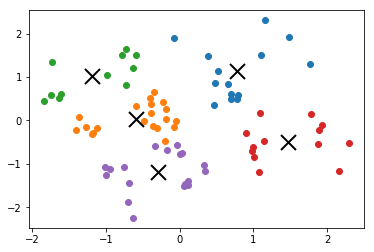

In [72]:
def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    df_info3["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids


    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
#         plt.scatter(ds[:,0],ds[:,1], c=df7["clusters"], s=20)
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return labels


# pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,1:19])

# Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
# plt.show()


label = kmeansshow(5,pca_transformed)

In [73]:
d = df_info3.sort_values(by=['clusters'])
d.to_csv('profile_user_clustering_not_entered_store.csv', encoding='utf-8', index=False)

In [80]:
df_entered = df[df['ร้าน 3 ป. ขาหมู อาหารตามสั่ง']==1]
df_entered
df_info_user_entered = pd.DataFrame()

for i in df_entered['user_id']:
    df_info_user_entered= df_info_user_entered.append(df_info2.loc[df_info2['user_id'] == i])

In [82]:
# df_info_user_entered
df_info_user_entered
df_info_user_entered.to_csv('profile_user_clustering_entered_store.csv', encoding='utf-8', index=False)

In [87]:
pca = PCA(n_components=2)
pca_transformed2 = pca.fit_transform(df_info_user_entered.ix[:,1:29])

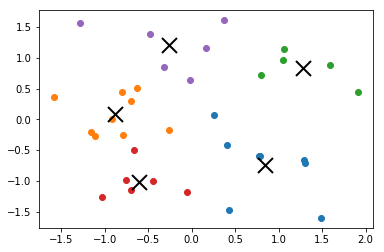

In [91]:

def kmeansshow(k,X):

    from sklearn import cluster
    from matplotlib import pyplot
    import numpy as np

    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)

    labels = kmeans.labels_
    df_info_user_entered["clusters"] = kmeans.labels_
    centroids = kmeans.cluster_centers_
    #print centroids


    for i in range(k):
        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        # plot the data observations
#         plt.scatter(ds[:,0],ds[:,1], c=df7["clusters"], s=20)
        pyplot.plot(ds[:,0],ds[:,1],'o')
        # plot the centroids
        lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
        # make the centroid x's bigger
        pyplot.setp(lines,ms=15.0)
        pyplot.setp(lines,mew=2.0)
    pyplot.show()
    return labels


# pca = PCA(2)

# Turn the dummified df into two columns with PCA
# plot_columns = pca.fit_transform(df7.ix[:,1:19])

# Plot based on the two dimensions, and shade by cluster label
# plt.scatter(x=plot_columns[:,1], y=plot_columns[:,0], c=df6["clusters"], s=30)
# plt.show()


label = kmeansshow(5,pca_transformed2)

In [92]:
d = df_info_user_entered.sort_values(by=['clusters'])
d.to_csv('profile_entered_store.csv', encoding='utf-8', index=False)

In [93]:
 df_info_user_never_entered.iloc[0]['user_id']

52.0